In [123]:
import pandas as pd
import json
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sb

In [124]:
df = pd.read_csv('train_v2.csv', nrows = 200000)

/Users/kasey.larsen/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [125]:
df.head()

,channelGrouping,customDimensions,date,device,fullVisitorId,geoNetwork,hits,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,"[{'index': '4', 'value': 'EMEA'}]",20171016,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",3162355547410993243,"{""continent"": ""Europe"", ""subContinent"": ""Weste...","[{'hitNumber': '1', 'time': '0', 'hour': '17',...",Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1508198450,1,1508198450
1,Referral,"[{'index': '4', 'value': 'North America'}]",20171016,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",8934116514970143966,"{""continent"": ""Americas"", ""subContinent"": ""Nor...","[{'hitNumber': '1', 'time': '0', 'hour': '10',...",Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""2"", ""pageviews"": ""2"",...","{""referralPath"": ""/a/google.com/transportation...",1508176307,6,1508176307
2,Direct,"[{'index': '4', 'value': 'North America'}]",20171016,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",7992466427990357681,"{""continent"": ""Americas"", ""subContinent"": ""Nor...","[{'hitNumber': '1', 'time': '0', 'hour': '17',...",Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""2"", ""pageviews"": ""2"",...","{""campaign"": ""(not set)"", ""source"": ""(direct)""...",1508201613,1,1508201613
3,Organic Search,"[{'index': '4', 'value': 'EMEA'}]",20171016,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9075655783635761930,"{""continent"": ""Asia"", ""subContinent"": ""Western...","[{'hitNumber': '1', 'time': '0', 'hour': '9', ...",Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""2"", ""pageviews"": ""2"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1508169851,1,1508169851
4,Organic Search,"[{'index': '4', 'value': 'Central America'}]",20171016,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",6960673291025684308,"{""continent"": ""Americas"", ""subContinent"": ""Cen...","[{'hitNumber': '1', 'time': '0', 'hour': '14',...",Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""2"", ""pageviews"": ""2"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1508190552,1,1508190552


In [126]:
json_columns = ['device', 'geoNetwork', 'totals', 'trafficSource']

In [127]:
for cols in json_columns:
    df_norm = pd.json_normalize([json.loads(val) for val in df[cols]]).fillna(0)
    df = pd.merge(df, df_norm, left_index=True, right_index=True)

In [128]:
df = df.drop(['socialEngagementType', 'browserVersion', 'browserSize', 'operatingSystemVersion',
              'mobileDeviceBranding', 'adwordsClickInfo.criteriaParameters', 'mobileDeviceModel', 
              'mobileInputSelector', 'mobileDeviceInfo', 'mobileDeviceMarketingName', 'flashVersion', 
              'language', 'screenColors', 'screenResolution', 'metro', 'city', 'adwordsClickInfo.isVideoAd',
              'cityId', 'networkDomain', 'latitude', 'longitude', 'networkLocation',
              'campaign', 'keyword', 'referralPath', 'adwordsClickInfo.gclId',
              'device', 'geoNetwork', 'totals', 'trafficSource', 'customDimensions', 'hits_x', 'visits'
             ], axis=1)

In [129]:
df.replace(['(not set)', 'not available in demo dataset', '(none)'], np.nan, inplace=True)
df['isTrueDirect'].replace(0, 'False', inplace=True)
df['adContent'].replace(0, np.nan, inplace=True)
df['adwordsClickInfo.adNetworkType'].replace(0, np.nan, inplace=True)
df['adwordsClickInfo.slot'].replace(0, np.nan, inplace=True)

In [130]:
df['pageviews'] = df['pageviews'].astype(int)
df['newVisits'] = df['newVisits'].astype(int)
df['bounces'] = df['bounces'].astype(int)
df['transactionRevenue'] = df['transactionRevenue'].astype(int)
df['totalTransactionRevenue'] = df['totalTransactionRevenue'].astype(int)
df['fullVisitorId'] = df['fullVisitorId'].astype(str)
df['visitId'] = df['visitId'].astype(str)

In [131]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
df['weekday'] = df['date'].dt.weekday
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 35 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   channelGrouping                 200000 non-null  object        
 1   date                            200000 non-null  datetime64[ns]
 2   fullVisitorId                   200000 non-null  object        
 3   visitId                         200000 non-null  object        
 4   visitNumber                     200000 non-null  int64         
 5   visitStartTime                  200000 non-null  int64         
 6   browser                         199999 non-null  object        
 7   operatingSystem                 198643 non-null  object        
 8   isMobile                        200000 non-null  bool          
 9   deviceCategory                  200000 non-null  object        
 10  continent                       199717 non-null  object 

In [133]:
df.describe()

,visitNumber,visitStartTime,pageviews,bounces,newVisits,transactionRevenue,totalTransactionRevenue,weekday,day,month,year
count,200000.000000,2.000000e+05,200000.000000,200000.000000,200000.000000,2.000000e+05,2.000000e+05,200000.000000,200000.000000,200000.000000,200000.000000
mean,2.343660,1.497306e+09,3.703680,0.505325,0.764915,1.322792e+06,1.486460e+06,3.032170,15.802365,6.847285,2016.918070
std,9.358663,1.648023e+07,6.418431,0.499973,0.424053,3.101191e+07,3.563284e+07,1.843166,8.523651,3.672291,0.721596
min,1.000000,1.470899e+09,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,1.000000,1.000000,2016.000000
25%,1.000000,1.480561e+09,1.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,2.000000,10.000000,3.000000,2016.000000
50%,1.000000,1.497747e+09,1.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,3.000000,15.000000,8.000000,2017.000000
75%,1.000000,1.510764e+09,4.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,4.000000,22.000000,10.000000,2017.000000
max,456.000000,1.525072e+09,400.000000,1.000000,1.000000,5.498000e+09,5.945580e+09,6.000000,31.000000,12.000000,2018.000000


In [134]:
df.to_csv('df_clean.csv', index=False)

In [135]:
df_clean = pd.read_csv('df_clean.csv')

/Users/kasey.larsen/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (2,30) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


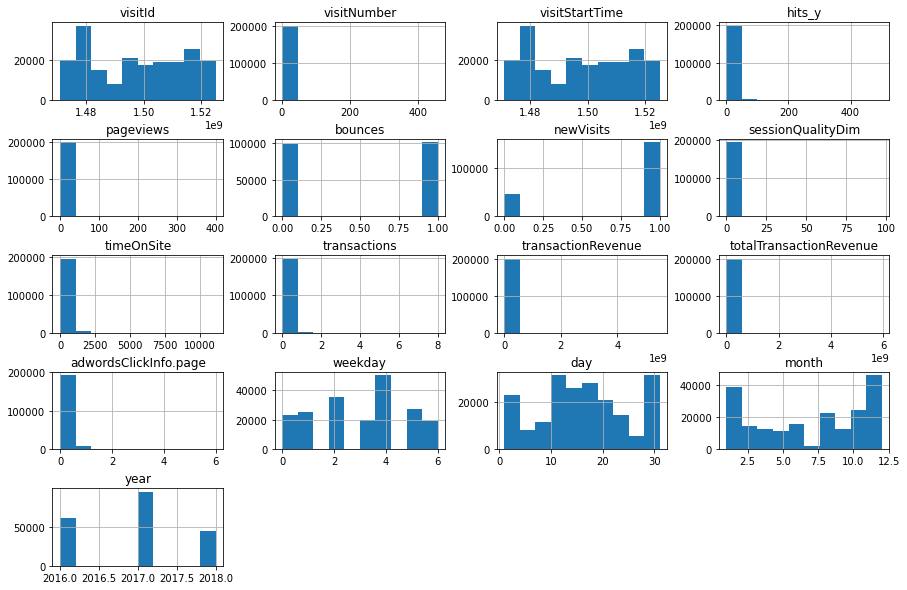

In [136]:
df_clean.hist(figsize = (15,10))
plt.subplots_adjust(hspace=0.5);

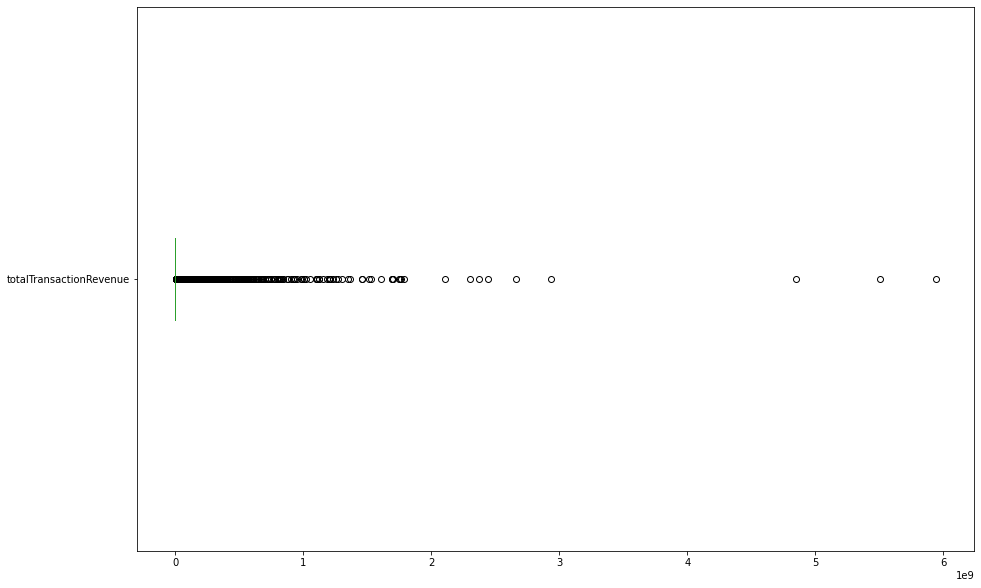

In [67]:
plt.figure(figsize=(15, 10))
df_clean['totalTransactionRevenue'].plot(kind='box', vert=False);

In [145]:
y = df_clean['totalTransactionRevenue']
removed_outliers = y.between(y.quantile(.001), y.quantile(.999))

In [146]:
removed_outliers.value_counts()

True     199600
False       200
Name: totalTransactionRevenue, dtype: int64

In [147]:
index_names = df_clean[~removed_outliers].index
df_clean_outliers = df_clean.drop(index_names)

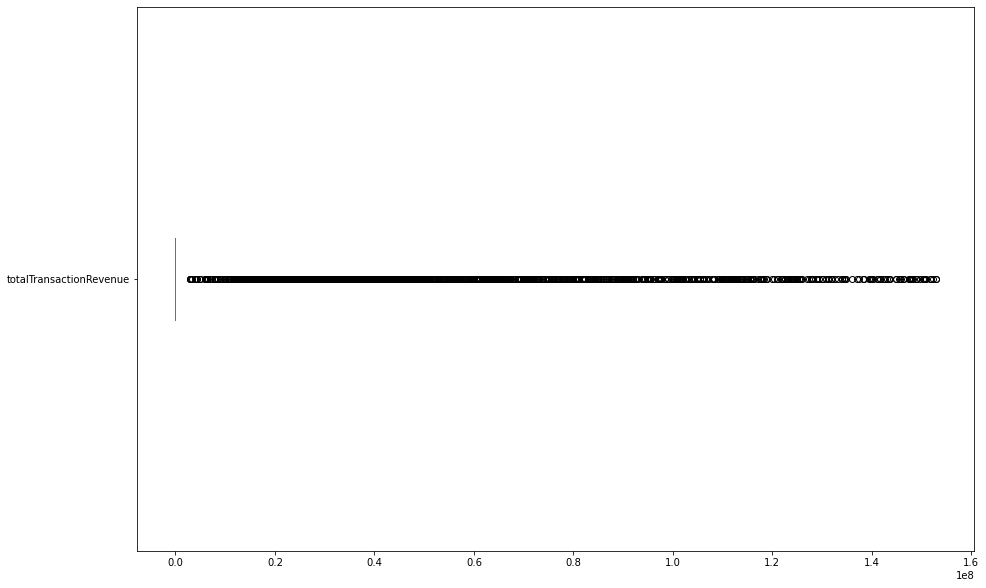

In [148]:
plt.figure(figsize=(15, 10))
df_clean_outliers['totalTransactionRevenue'].plot(kind='box', vert=False);

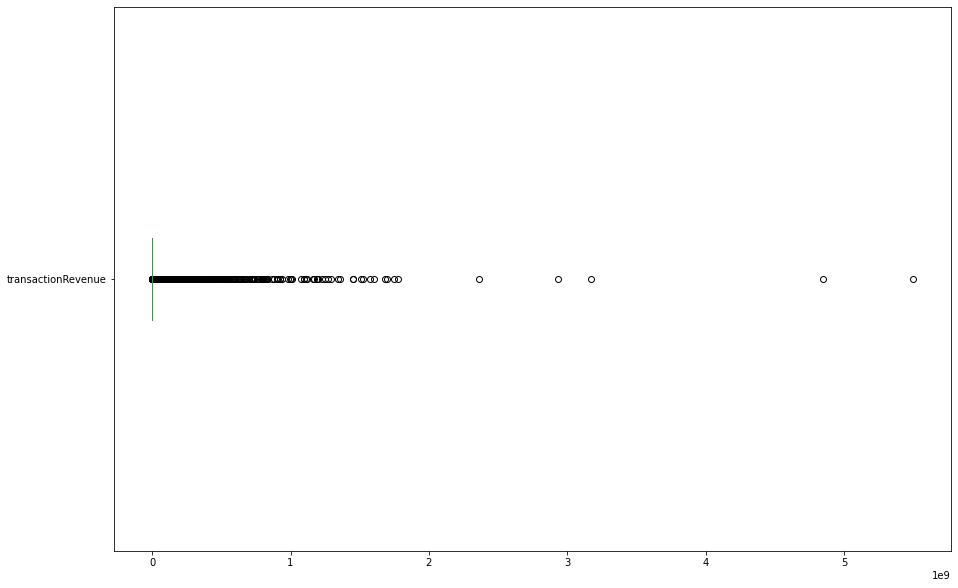

In [69]:
plt.figure(figsize=(15, 10))
df_clean['transactionRevenue'].plot(kind='box', vert=False);

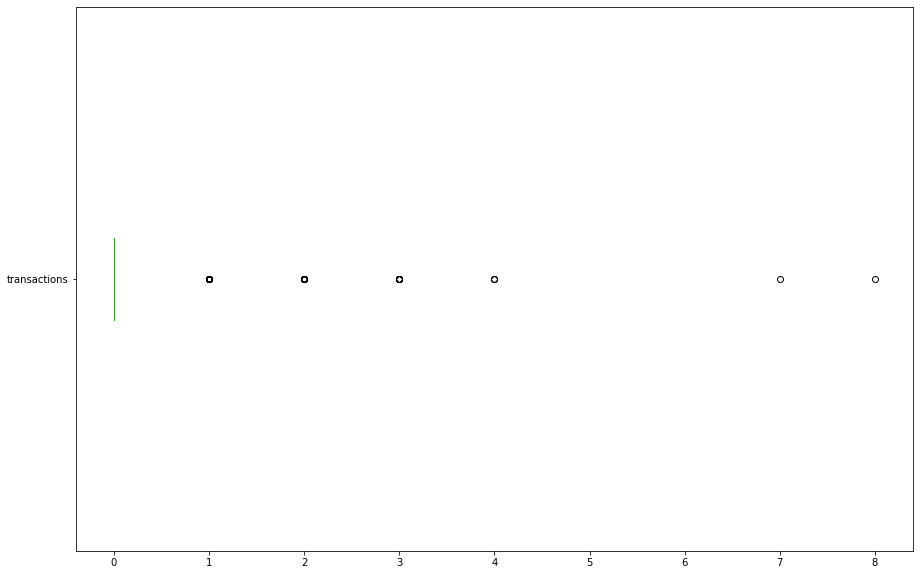

In [73]:
plt.figure(figsize=(15, 10))
df_clean['transactions'].plot(kind='box', vert=False);

<AxesSubplot:ylabel='browser'>

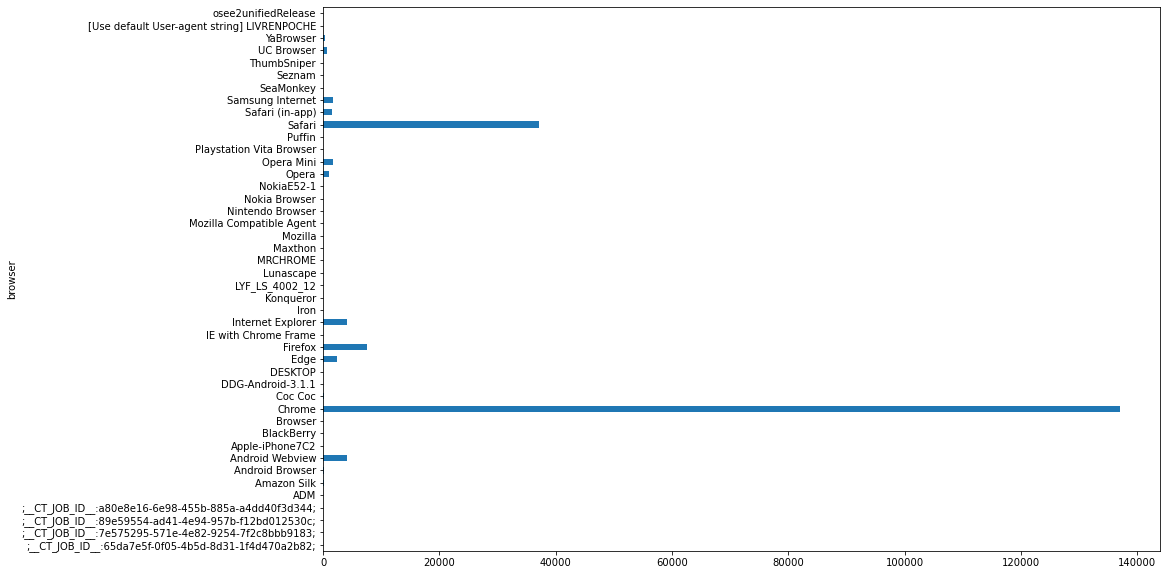

In [81]:
plt.figure(figsize=(15, 10))
df.groupby('browser')['totalTransactionRevenue'].count().plot(kind='barh') 

<Figure size 1440x1008 with 0 Axes>

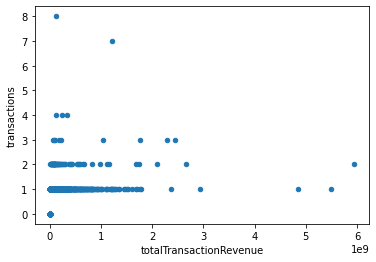

In [77]:
df.plot(x='totalTransactionRevenue', y='transactions', kind='scatter');

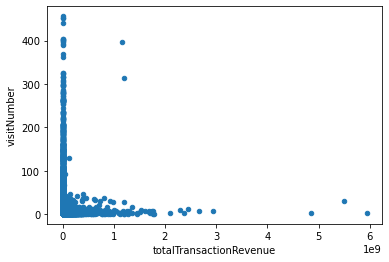

In [78]:
df.plot(x='totalTransactionRevenue', y='visitNumber', kind='scatter');

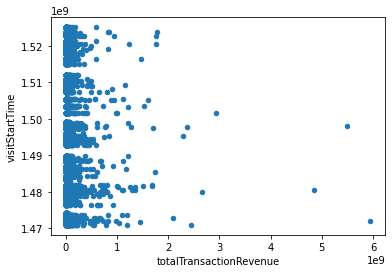

In [83]:
df.plot(x='totalTransactionRevenue', y='visitStartTime', kind='scatter');

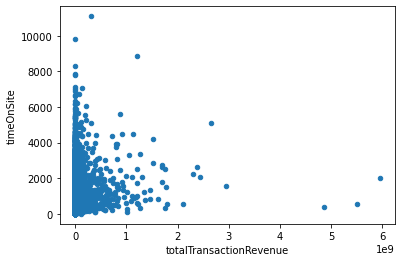

In [107]:
df.plot(x='totalTransactionRevenue', y='timeOnSite', kind='scatter');

<AxesSubplot:ylabel='browser'>

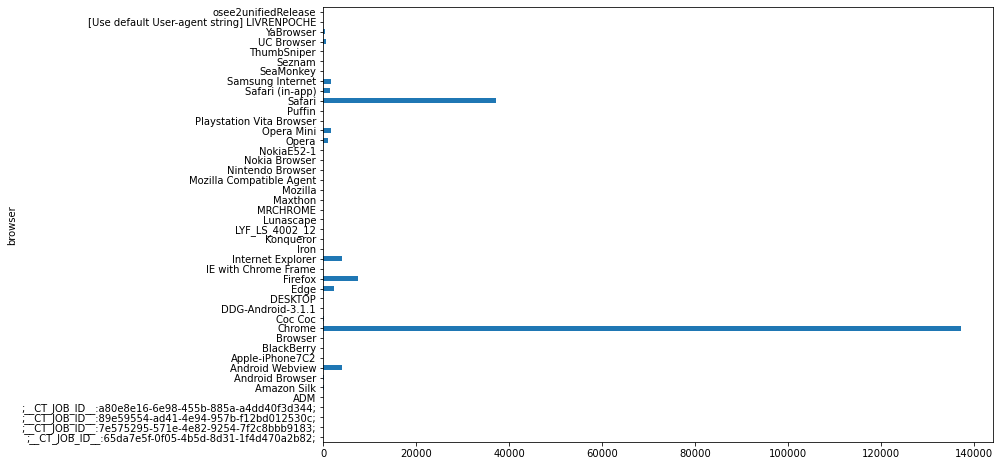

In [87]:
plt.figure(figsize=(12, 8))
df.groupby('browser')['totalTransactionRevenue'].count().plot(kind='barh') 

<AxesSubplot:ylabel='operatingSystem'>

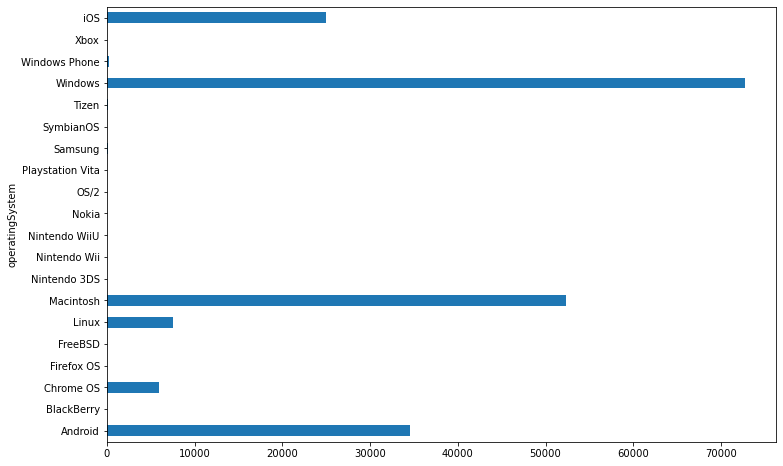

In [88]:
plt.figure(figsize=(12, 8))
df.groupby('operatingSystem')['totalTransactionRevenue'].count().plot(kind='barh') 

<AxesSubplot:ylabel='isMobile'>

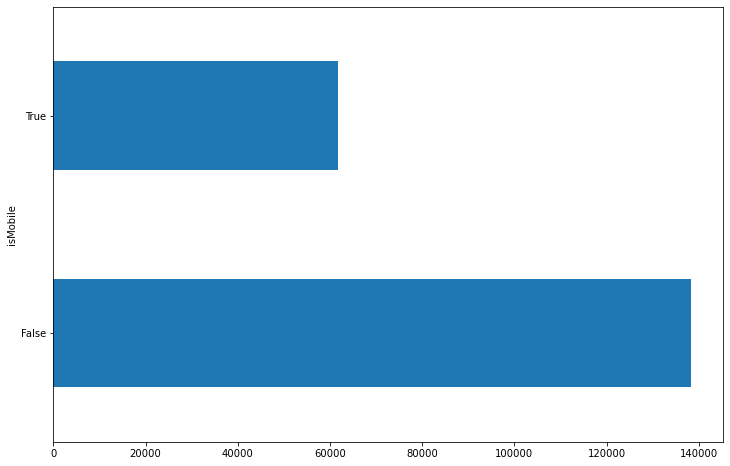

In [89]:
plt.figure(figsize=(12, 8))
df.groupby('isMobile')['totalTransactionRevenue'].count().plot(kind='barh') 

<AxesSubplot:ylabel='deviceCategory'>

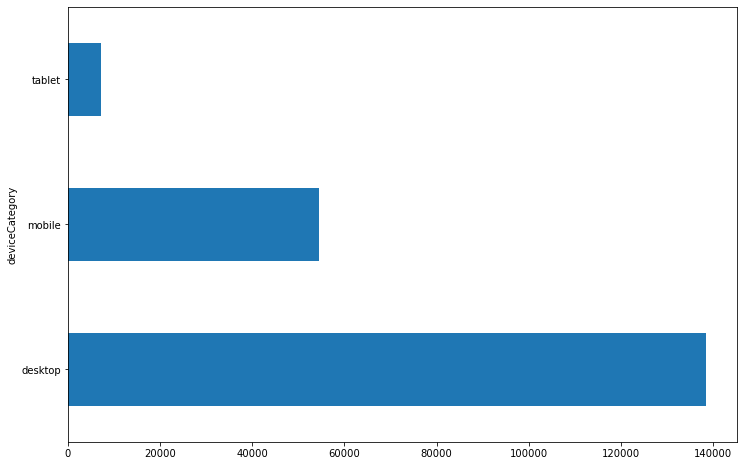

In [90]:
plt.figure(figsize=(12, 8))
df.groupby('deviceCategory')['totalTransactionRevenue'].count().plot(kind='barh') 

<AxesSubplot:ylabel='continent'>

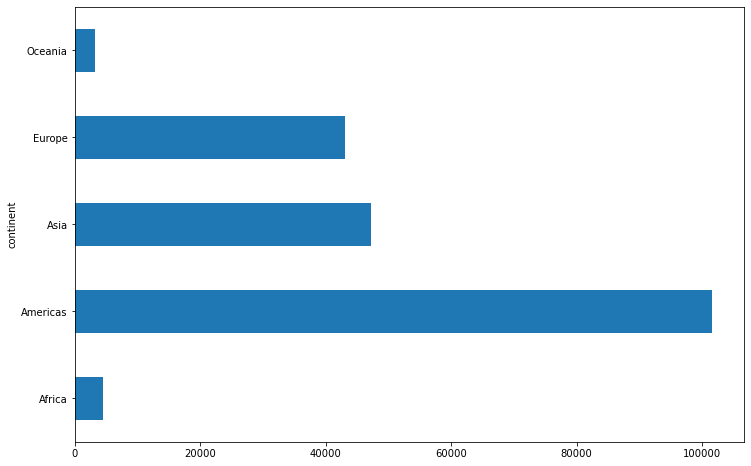

In [92]:
plt.figure(figsize=(12, 8))
df.groupby('continent')['totalTransactionRevenue'].count().plot(kind='barh') 

<AxesSubplot:ylabel='subContinent'>

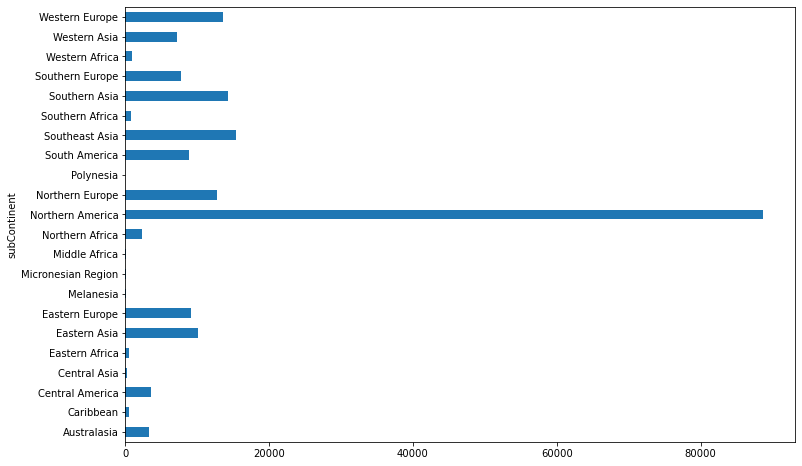

In [93]:
plt.figure(figsize=(12, 8))
df.groupby('subContinent')['totalTransactionRevenue'].count().plot(kind='barh') 

<Figure size 864x576 with 0 Axes>

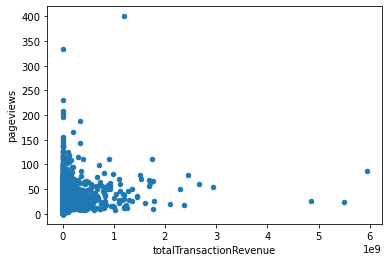

In [100]:
plt.figure(figsize=(12, 8))
df.plot(x='totalTransactionRevenue', y='pageviews', kind='scatter');

<Figure size 864x576 with 0 Axes>

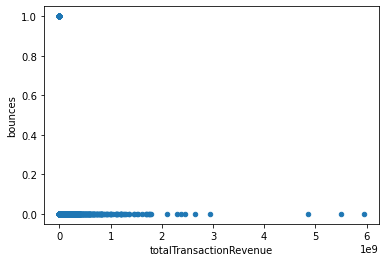

In [101]:
plt.figure(figsize=(12, 8))
df.plot(x='totalTransactionRevenue', y='bounces', kind='scatter');

<AxesSubplot:ylabel='newVisits'>

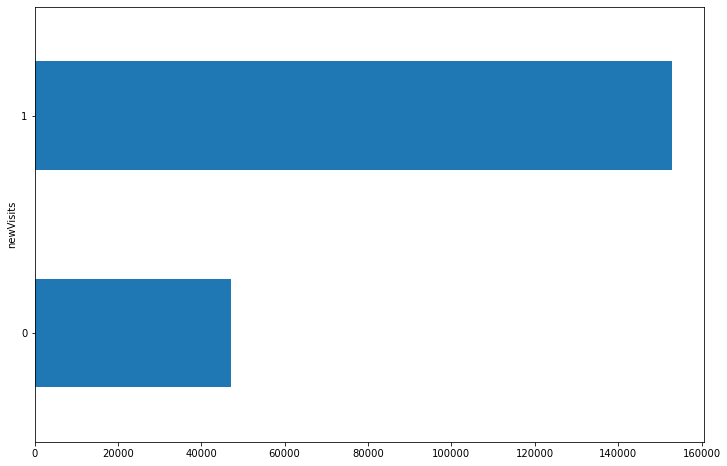

In [103]:
plt.figure(figsize=(12, 8))
df.groupby('newVisits')['totalTransactionRevenue'].count().plot(kind='barh') 

<AxesSubplot:ylabel='sessionQualityDim'>

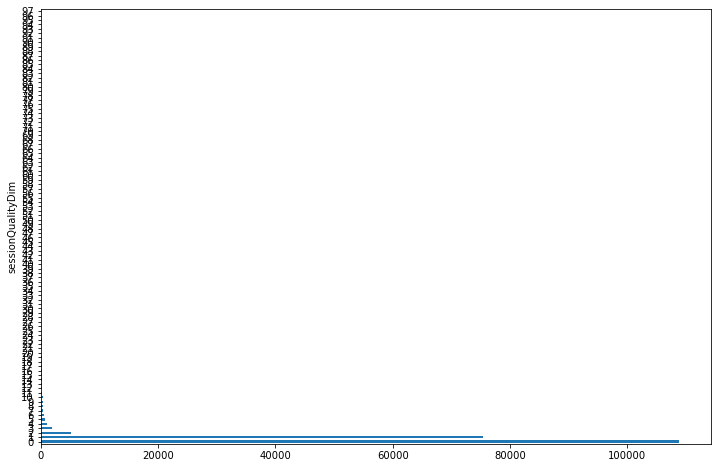

In [106]:
plt.figure(figsize=(12, 8))
df.groupby('sessionQualityDim')['totalTransactionRevenue'].count().plot(kind='barh') 

<AxesSubplot:ylabel='weekday'>

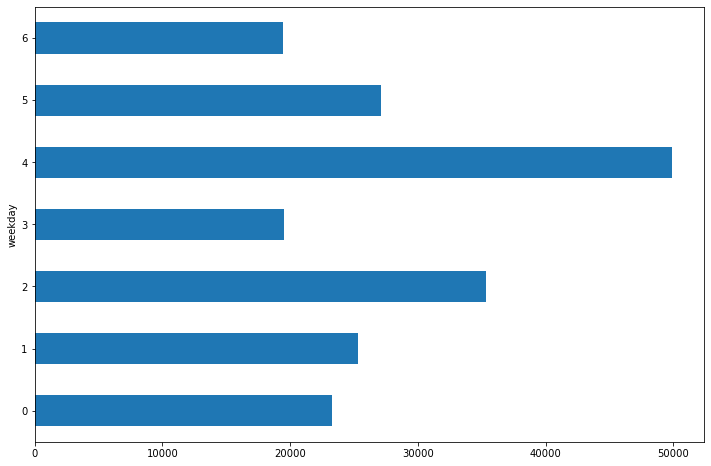

In [108]:
plt.figure(figsize=(12, 8))
df.groupby('weekday')['totalTransactionRevenue'].count().plot(kind='barh') 

<AxesSubplot:ylabel='day'>

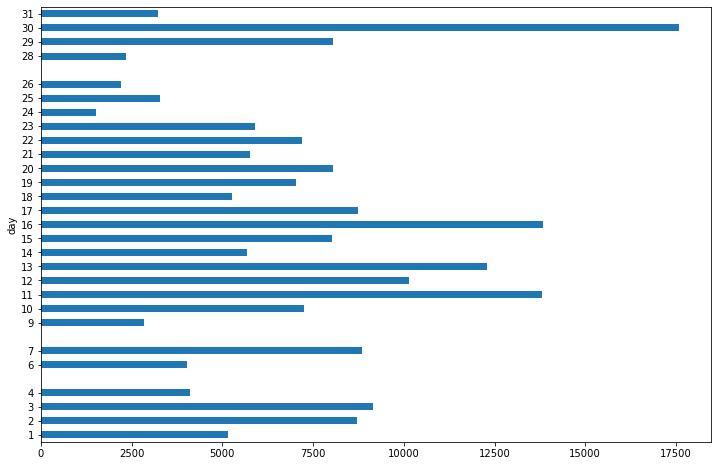

In [109]:
plt.figure(figsize=(12, 8))
df.groupby('day')['totalTransactionRevenue'].count().plot(kind='barh') 

<AxesSubplot:ylabel='month'>

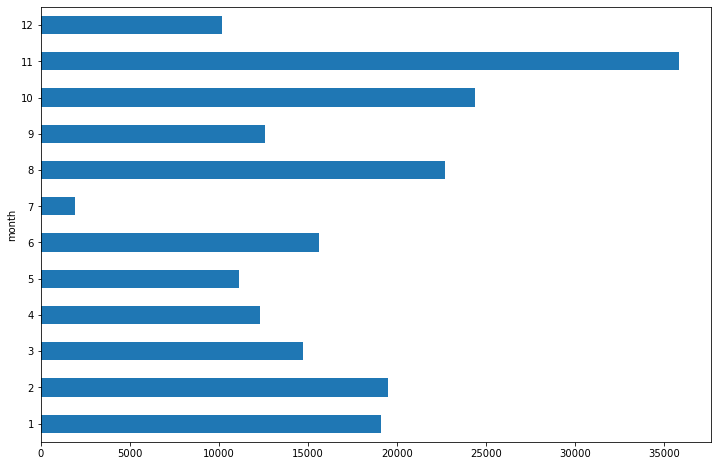

In [110]:
plt.figure(figsize=(12, 8))
df.groupby('month')['totalTransactionRevenue'].count().plot(kind='barh') 

<AxesSubplot:ylabel='year'>

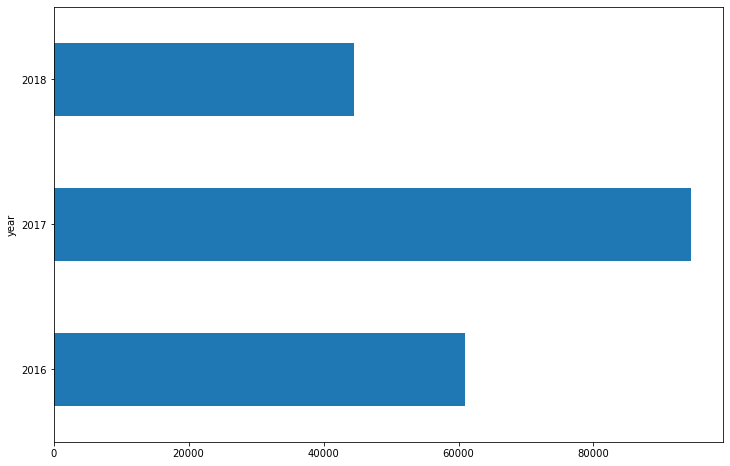

In [111]:
plt.figure(figsize=(12, 8))
df.groupby('year')['totalTransactionRevenue'].count().plot(kind='barh') 

<AxesSubplot:xlabel='weekday', ylabel='totalTransactionRevenue'>

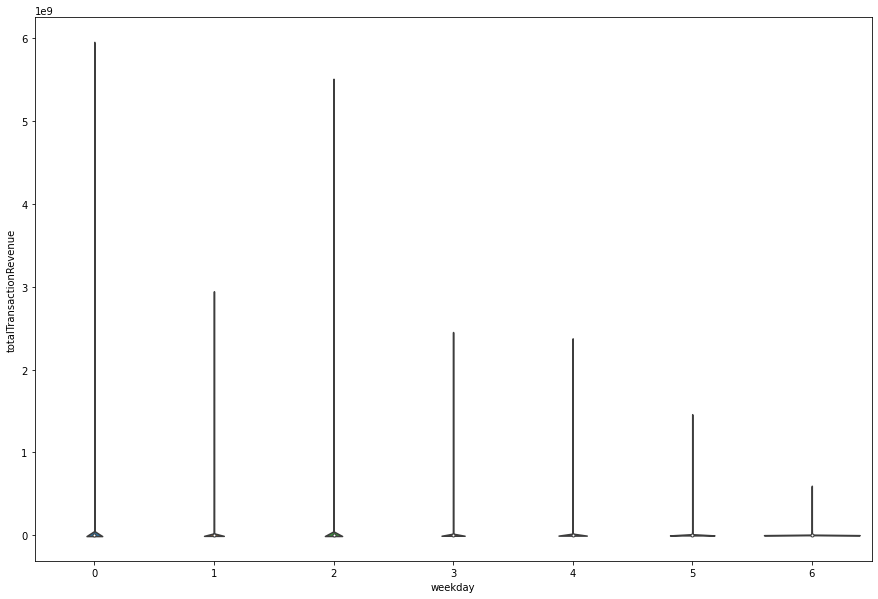

In [113]:
plt.figure(figsize = [15, 10]) 
sb.violinplot(data = df_clean, x = 'weekday', y = 'totalTransactionRevenue')

<AxesSubplot:xlabel='year', ylabel='totalTransactionRevenue'>

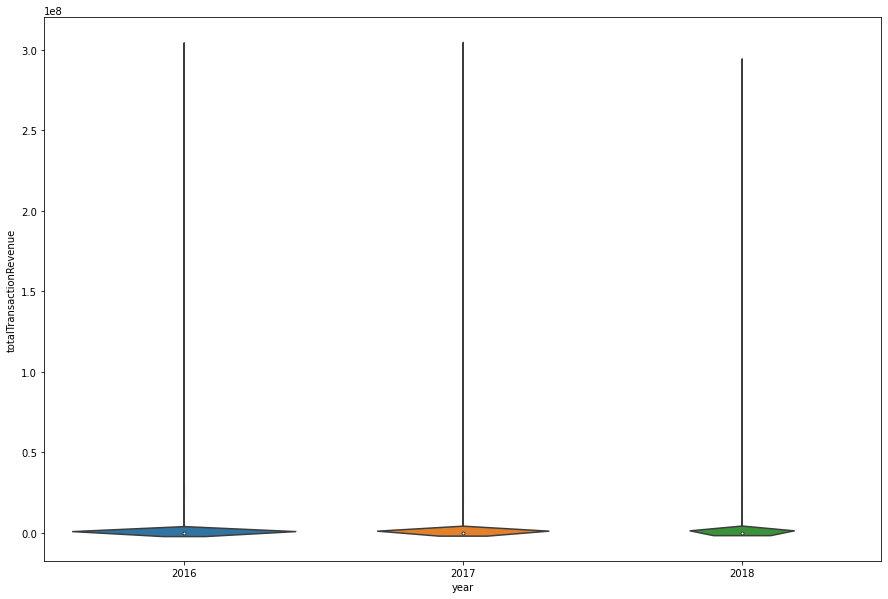

In [150]:
plt.figure(figsize = [15, 10]) 
sb.violinplot(data = df_clean, x = 'year', y = 'totalTransactionRevenue')

<AxesSubplot:xlabel='transactions', ylabel='totalTransactionRevenue'>

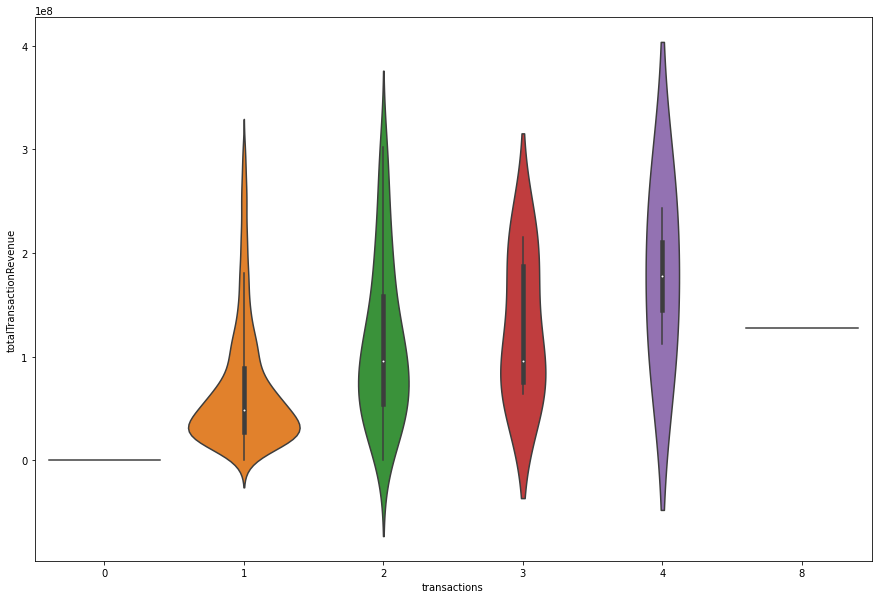

In [151]:
plt.figure(figsize = [15, 10]) 
sb.violinplot(data = df_clean, x = 'transactions', y = 'totalTransactionRevenue')

<AxesSubplot:xlabel='continent', ylabel='totalTransactionRevenue'>

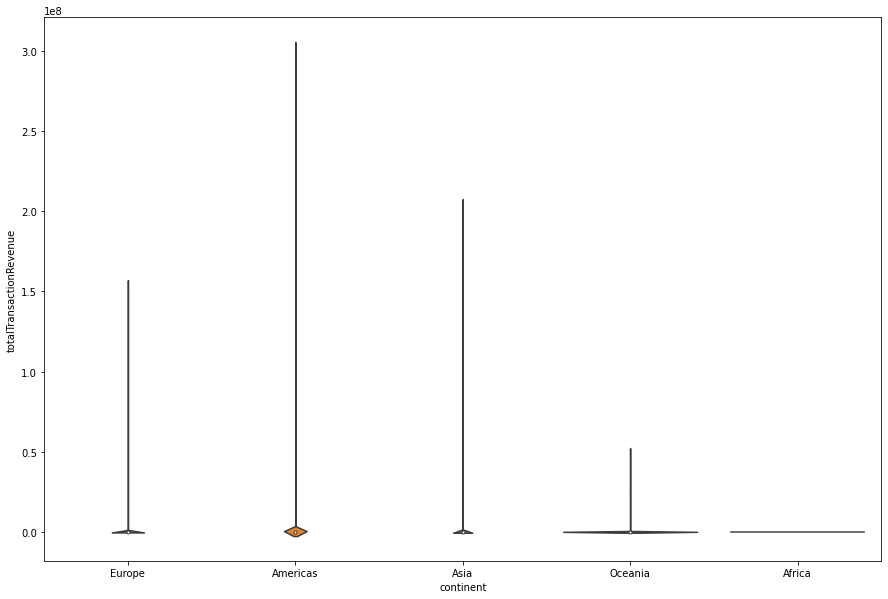

In [153]:
plt.figure(figsize = [15, 10]) 
sb.violinplot(data = df_clean, x = 'continent', y = 'totalTransactionRevenue')

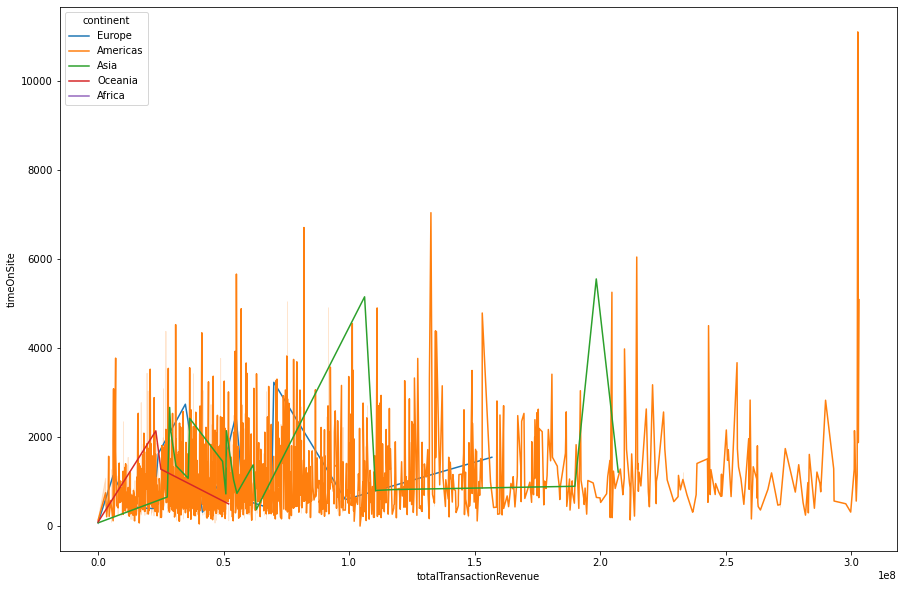

In [158]:
plt.figure(figsize = [15, 10]) 
sb.lineplot(data = df_clean, x = 'totalTransactionRevenue', y = 'timeOnSite', hue = 'continent');

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 35 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   channelGrouping                 200000 non-null  object        
 1   date                            200000 non-null  datetime64[ns]
 2   fullVisitorId                   200000 non-null  object        
 3   visitId                         200000 non-null  object        
 4   visitNumber                     200000 non-null  int64         
 5   visitStartTime                  200000 non-null  int64         
 6   browser                         199999 non-null  object        
 7   operatingSystem                 198643 non-null  object        
 8   isMobile                        200000 non-null  bool          
 9   deviceCategory                  200000 non-null  object        
 10  continent                       199717 non-null  object 

In [105]:
df_clean['sessionQualityDim'].head()

0    1
1    2
2    1
3    1
4    1
Name: sessionQualityDim, dtype: int64